In [1]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 
from ISLP import load_data 
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly)

In [135]:
# *args allows any number of non-names args to abline
# **kwargs allows any number of named args (like linewidth=3)
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

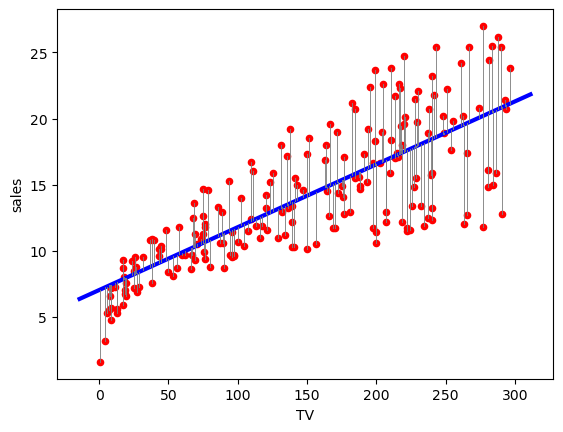

In [136]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# terms = advertising.columns.drop(['sales', 'Unnamed: 0'])
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
ax = advertising.plot.scatter('TV', 'sales', c='red')
abline(ax, 
       results.params.iloc[0], 
       results.params.iloc[1], 
       'b-', 
       linewidth=3)
# Plot the residuals
y_pred = results.fittedvalues
for x, y_actual, y_hat in zip(advertising['TV'], y, y_pred):
    ax.plot([x, x], [y_actual, y_hat], color='gray', linewidth=0.7, alpha=0.9)

***Figure 3.1.***: For the advertising data, the least squares fit for the regression of sales onto TV. Each grey line segment is a residual. 

### Broadcasting review: 
When performing operations on two arrays, NumPy compares their shapes right to left:

1. If the dimensions match (or either is 1), they are compatible.

2. If the dimensions don't match and neither is 1, broadcasting fails.

NumPy virtually stretches any dimension of size 1 to match the other

In [41]:
# Ex. 1 
x = np.array([1, 2, 3])
x + 10                          # Scalar gets broadcast -> [11, 12, 13]

array([11, 12, 13])

In [42]:
# Ex. 2 
a = np.array([[1], [2], [3]])   # (3,1)
b = np.array([10, 20, 30])      # (3,) same as (1,3)
a + b                           # (3, 3)

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

In [43]:
# Ex. 3 Adding singletons for broadcasting an outerproduct
arr1 = np.array([1, 2, 3])                                     # (3, )
print(f"The shape of \n {arr1[:, None]} is \n {arr1[:, None].shape}") # (3,1)
arr2 = np.array([10, 20, 30, 40])                              # (4, )
print(f"The shape of {arr2[None, :]} is {arr2[None, :].shape}")   # (1,4)
outer = arr1[:, None] * arr2[None, :]                             # (3,1) * (1,4) -> (3,4)
print(f"The shape of outer \n {outer} is \n{outer.shape}")

The shape of 
 [[1]
 [2]
 [3]] is 
 (3, 1)
The shape of [[10 20 30 40]] is (1, 4)
The shape of outer 
 [[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]] is 
(3, 4)


xvals:
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
yvals:
[-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
  1.33333333  2.22222222  3.11111111  4.        ]

xcoord (x grid):
[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.777777

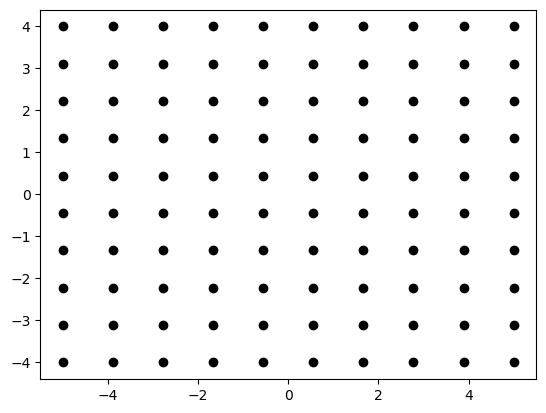

In [44]:
nx, ny = (10,10)
xvals = np.linspace(-5, 5, nx)
yvals = np.linspace(-4, 4, ny)
xcoord, ycoord = np.meshgrid(xvals, yvals)
print(f'xvals:\n{xvals}')
print(f'yvals:\n{yvals}')
print(f'\nxcoord (x grid):\n{xcoord}')
print(f'ycoord (y grid):\n{ycoord}')
fig, ax = subplots()
ax.plot(xcoord, ycoord, 'ko');

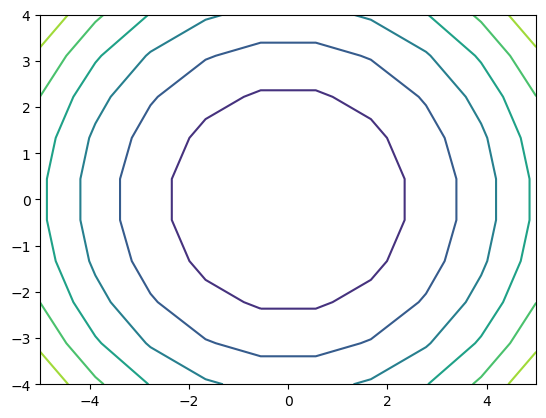

In [45]:
fig, ax = subplots()
z = xcoord**2 + ycoord**2 
ax.contour(xcoord, ycoord, z);

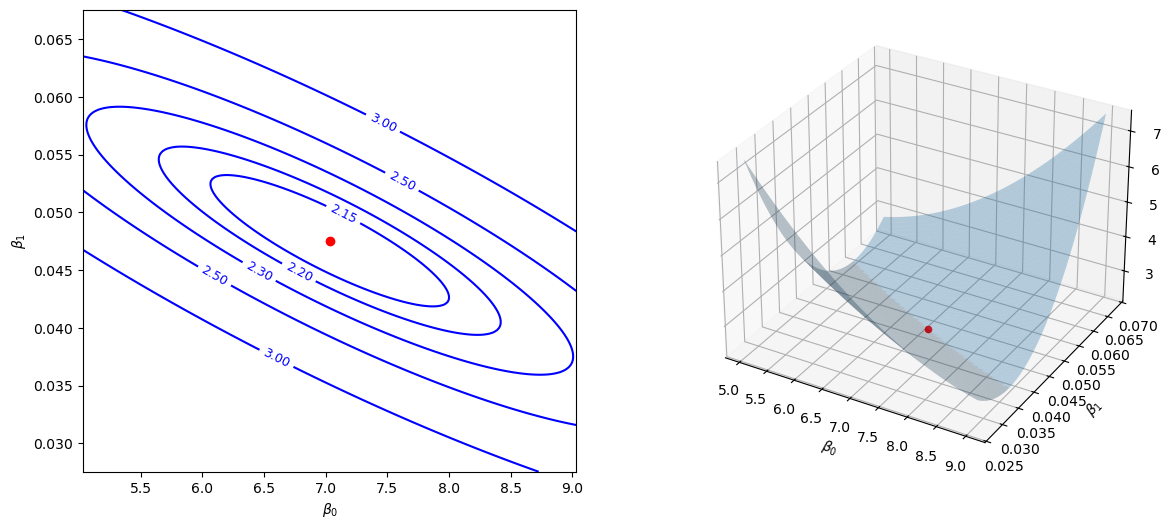

In [46]:
# Let's create an array of equally spaced values around beta0, beta1
beta0 = np.linspace(results.params.iloc[0] - 2, results.params.iloc[0] + 2, 200)
beta1 = np.linspace(results.params.iloc[1] - 0.02, results.params.iloc[1] + 0.02, 200)
beta0c, beta1c = np.meshgrid(beta0, beta1)
x_values = X.values[:,1]
y_values = y.values
y_pred = beta0c[None, :, :] + x_values[:, None, None] * beta1c[None, :, :]
residuals = y_values[:, None, None] - y_pred
rss = np.sum(residuals**2, axis=0)/1000
# To create two subplots with different projections 2D and 3D we need to create each subplot separately with projection
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(beta0c, beta1c, rss, colors='blue', levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.clabel(CS, fontsize=9, colors='blue')
ax1.scatter(results.params.iloc[0], results.params.iloc[1], color='red')
ax2 = fig.add_subplot(122, projection='3d')
# alpha will change the opacity of the surface
ax2.plot_surface(beta0c, beta1c, rss, rstride=3, cstride=3, alpha=0.3)
ax2.scatter3D(results.params.iloc[0], results.params.iloc[1], rss.min(), color='red')
ax2.view_init(elev=30, azim=-60)
ax2.set_zlim(rss.min(), rss.max())
for ax in fig.axes: 
    ax.set_xlabel(r"$\beta_0$")
    ax.set_ylabel(r"$\beta_1$")
ax2.set_zlabel(r"$RSS$")
#plt.subplots_adjust(wspace=0.1)
plt.show()

In [47]:
# More modular versions of above code 
def compute_rss_surface(b0_range, b1_range, x_values, y_values, scale=1000.0):
    """
    Compute a 2D grid of RSS for intercept (b0) and slope (b1) values.
    
    Parameters
    ----------
    b0_range : np.ndarray
        1D array of possible beta0 (intercept) values.
    b1_range : np.ndarray
        1D array of possible beta1 (slope) values.
    x_values : np.ndarray
        Flattened feature array, shape (n_samples,).
    y_values : np.ndarray
        Target array, shape (n_samples,).
    scale : float
        Factor to divide raw RSS by (purely for nicer plotting ranges).

    Returns
    -------
    B0, B1 : np.ndarray
        Meshgrid of shape (len(b1_range), len(b0_range)) for intercept & slope.
    rss : np.ndarray
        RSS at each (b0, b1) point, same shape as B0 & B1.
    """
    B0, B1 = np.meshgrid(b0_range, b1_range)  # (n_b1, n_b0)
    
    # Broadcast x and (b0, b1) to compute predictions
    y_pred = B0[None, :, :] + x_values[:, None, None] * B1[None, :, :]
    residuals = y_values[:, None, None] - y_pred
    
    rss_raw = np.sum(residuals**2, axis=0)  # (n_b1, n_b0)
    rss = rss_raw / scale
    return B0, B1, rss

In [48]:
def plot_contour_and_surface(B0, B1, rss, b0_est, b1_est, levels=None):
    """
    Display a 2D contour of RSS and a 3D surface side by side.

    Parameters
    ----------
    B0, B1 : np.ndarray
        Meshgrids for beta0, beta1 (shapes match rss).
    rss : np.ndarray
        2D array of RSS values.
    b0_est, b1_est : float
        Highlighted "solution" point on both plots.
    levels : list of floats, optional
        Specific contour levels; if None, uses default levels.
    """
    # Create two subplots: left (2D), right (3D)
    fig = plt.figure(figsize=(14, 6))
    
    # --- (1) 2D Contour ---
    ax1 = fig.add_subplot(1, 2, 1)
    if levels is None:
        contour = ax1.contour(B0, B1, rss, cmap='viridis')
    else:
        contour = ax1.contour(B0, B1, rss, levels=levels, colors='blue')
        ax1.clabel(contour, fontsize=9, colors='blue')
    ax1.scatter(b0_est, b1_est, color='red', label='OLS Est.')
    ax1.set_xlabel(r"$\beta_0$")
    ax1.set_ylabel(r"$\beta_1$")
    ax1.set_title("RSS Contour")
    ax1.legend()
    ax1.grid(True)
    
    # --- (2) 3D Surface ---
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(B0, B1, rss, rstride=3, cstride=3, alpha=0.3)
    ax2.scatter3D(b0_est, b1_est, rss.min(), color='red')
    ax2.set_xlabel(r"$\beta_0$")
    ax2.set_ylabel(r"$\beta_1$")
    ax2.set_zlabel("RSS")
    ax2.view_init(elev=30, azim=-60)
    ax2.set_title("RSS Surface")
    
    plt.tight_layout()
    plt.show()

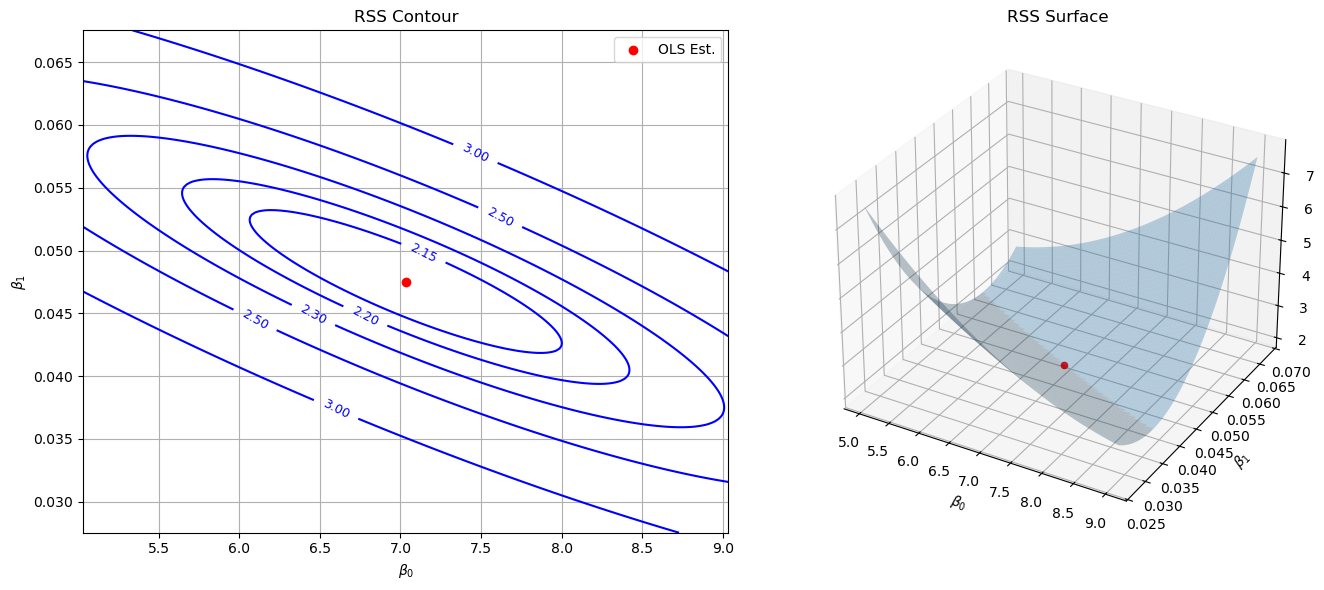

In [49]:

# b0_est and b1_est: from your fitted model, e.g. statsmodels OLS
b0_est = results.params.iloc[0]
b1_est = results.params.iloc[1]

# Ranges for beta0, beta1 around the estimated solution
b0_range = np.linspace(b0_est - 2, b0_est + 2, 200)
b1_range = np.linspace(b1_est - 0.02, b1_est + 0.02, 200)

# Compute the RSS surface
B0, B1, rss = compute_rss_surface(
    b0_range, b1_range, 
    x_values=X.values[:, 1],  # assume X[:,1] is your single feature
    y_values=y.values,
    scale=1000.0
)

# Plot both contour (2D) and surface (3D)
plot_contour_and_surface(B0, B1, rss, b0_est, b1_est, levels=[2.15, 2.2, 2.3, 2.5, 3])

***Figure 3.2.*** Contour and three-dimensional plots of the RSS on the
Advertising data, using sales as the response and TV as the predictor. The
red dots correspond to the least squares estimates $\beta_0$ and $\beta_1$.

In [50]:
# Noise level
sigma = 5 
# Sample size 
n = 100
# Noise for model 
noise = np.random.normal(0, sigma, n)
# Sample 100 points for X  
X = np.random.uniform(-3, 3, n)
y_data = 3 * X + 2 + noise
y_actual = 3 * X + 2 
model = sm.OLS(y_data, np.column_stack((np.ones(n), X)))   
results = model.fit()
results.params

array([1.32065928, 2.81039026])

In [51]:
def plot_k_fits(ax, k, n, sigma, *args, **kwargs):
    for _ in range(k):
        X = np.random.uniform(-3, 3, n)
        noise = np.random.normal(0, sigma, n)
        y_data = 3 * X + 2 + noise

        # Design matrix with intercept
        X_design = np.column_stack((np.ones(n), X))
        model = sm.OLS(y_data, X_design)
        results = model.fit()

        # Use fixed x range for consistency
        x_vals = np.linspace(-3, 3, 100)
        y_vals = results.params[0] + results.params[1] * x_vals

        ax.plot(x_vals, y_vals, *args, **kwargs)

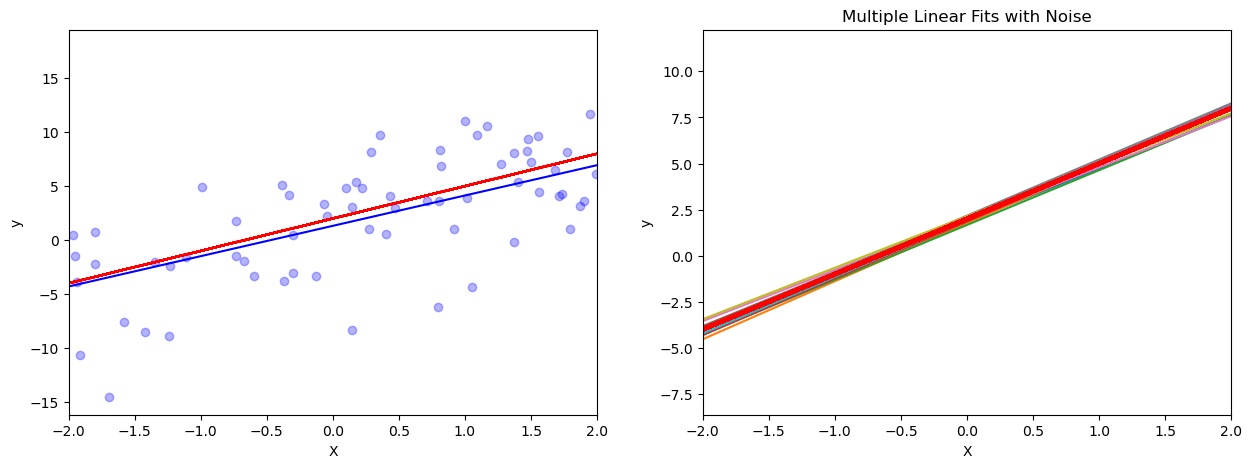

In [52]:
fig, ax = subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X, y_data, color='blue', alpha=0.3)
abline(ax[0], 
       results.params[0], 
       results.params[1],
       'b')
ax[0].plot(X, y_actual, color='red')
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
plot_k_fits(ax[1], k=10, n=100, sigma=2)
ax[1].plot(X, y_actual, color='red', linewidth=3)
ax[1].set_xlim(-2, 2)
ax[1].set_title('Multiple Linear Fits with Noise')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y');



***Figure 3.3.*** A simulated data set. Left: The red line represents the true
relationship, $f(X) = 2 + 3X$, which is known as the population regression line.
The blue line is the least squares line; it is the least squares estimate for $f(X)$
based on the observed data, shown in black. Right: The population regression line
is again shown in red, and the least squares line in dark blue. In light blue, ten
least squares lines are shown, each computed on the basis of a separate random
set of observations. Each least squares line is different, but on average, the least
squares lines are quite close to the population regression line.

In [53]:
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,7.0326,0.458,15.360,0.0
TV,0.0475,0.003,17.668,0.0


***Table 3.1.*** For the Advertising data, coefficients of the least squares model
for the regression of number of units sold on TV advertising budget. An increase
of $1,000 in the TV advertising budget is associated with an increase in sales by
around 50 units. (Recall that the sales variable is in thousands of units, and the
TV variable is in thousands of dollars.)

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        12:33:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Table 3.2.*** For the Advertising data, more information about the least
squares model for the regression of number of units sold on TV advertising budget.

### Simple Regression Case for Radio and Newspaper

In [55]:
X = MS(['radio']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [56]:
X = MS(['newspaper']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


***Table 3.3. and 3.4.***
A $1,000 increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increase in sales by around 55 units. (Note that the sales variable is in thousands of units, and the radio and newspaper variables are in thousands of dollars.)



### Multiple Regression Case

In [57]:
X = MS(['TV', 'radio', 'newspaper']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


***Table 3.4.*** For the Advertising data, least squares coefficient estimates of the
multiple linear regression of number of units sold on TV, radio, and newspaper
advertising budgets.

#### From ISLR p.82: 

"Table 3.4 displays the multiple regression coefficient estimates when TV,
radio, and newspaper advertising budgets are used to predict product sales
using the Advertising data. We interpret these results as follows: for a given
amount of TV and newspaper advertising, spending an additional $1,000 on
radio advertising is associated with approximately 189 units of additional
sales. Comparing these coefficient estimates to those displayed in Tables 3.1
and 3.3, we notice that the multiple regression coefficient estimates for
TV and radio are pretty similar to the simple linear regression coefficient
estimates. However, while the newspaper regression coefficient estimate in
Table 3.3 was significantly non-zero, the coefficient estimate for newspaper
in the multiple regression model is close to zero, and the corresponding p-
value is no longer significant, with a value around 0.86. This illustrates that
the simple and multiple regression coefficients can be quite different. This
difference stems from the fact that in the simple regression case, the slope
term represents the average increase in product sales associated with a
$1,000 increase in newspaper advertising, ignoring other predictors such as
TV and radio. By contrast, in the multiple regression setting, the coefficient
for newspaper represents the average increase in product sales associated
with increasing newspaper spending by $1,000 while holding TV and radio
fixed."

In [58]:
# How to drop a column from a dataframe. 
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
# Doesn't change the original dataframe. 
df.drop(columns=['A'])

,B,C,D
0,1,2,3
1,5,6,7
2,9,10,11


In [59]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# advertising = advertising.drop(columns=['Unnamed: 0']) 
# changes original dataframe. 
advertising.drop(columns=['Unnamed: 0'], inplace=True) # slightly more efficient
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


***Table 3.5***. Correlation matrix for TV, radio, newspaper, and sales for the
Advertising data.

#### From ISLR p.83: 

"Does it make sense for the multiple regression to suggest no relationship
between sales and newspaper while the simple linear regression implies the opposite? In fact it does. Consider the correlation matrix for the three
predictor variables and response variable, displayed in Table 3.5. Notice
that the correlation between radio and newspaper is 0.35. This indicates
that markets with high newspaper advertising tend to also have high ra-
dio advertising. Now suppose that the multiple regression is correct and
newspaper advertising is not associated with sales, but radio advertising
is associated with sales. Then in markets where we spend more on radio
our sales will tend to be higher, and as our correlation matrix shows, we
also tend to spend more on newspaper advertising in those same mar-
kets. Hence, in a simple linear regression which only examines sales versus
newspaper, we will observe that higher values of newspaper tend to be as-
sociated with higher values of sales, even though newspaper advertising is
not directly associated with sales. So newspaper advertising is a surrogate
for radio advertising; newspaper gets “credit” for the association between
radio on sales."


In [60]:
# Multiple regression fit using predictors 'radio' and 'TV' 
X = MS(['TV', 'radio']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.9211,0.294,9.919,0.0
TV,0.0458,0.001,32.909,0.0
radio,0.1880,0.008,23.382,0.0


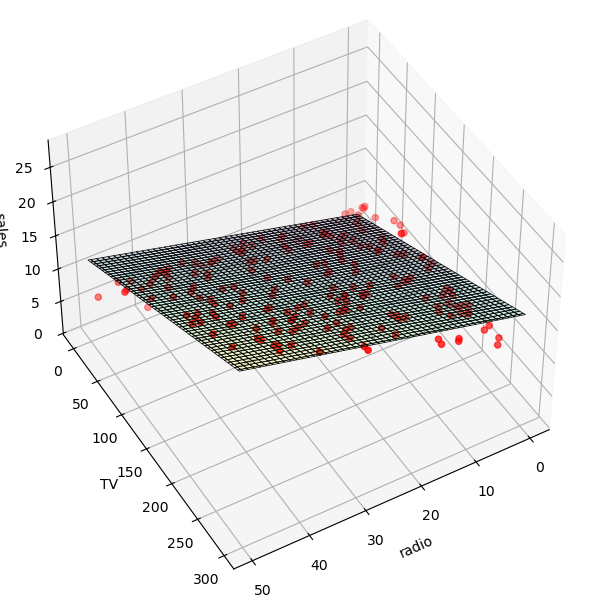

In [61]:
def compute_regression_coefficients(df, response, *features):
    X = MS(list(features)).fit_transform(df)
    y = df[response]
    model = sm.OLS(y, X)
    results = model.fit()
    return results.params

coeffs = compute_regression_coefficients(advertising, 'sales', 'radio', 'TV')
    
def plot_3d_surface(df, coeffs, *features, response='sales', res=100):
    #grid_axes = [np.arange(0, df[feature].max()) for feature in features]
    grid_axes = [np.linspace(0, df[feature].max(), res) for feature in features]
    x1, x2 = np.meshgrid(*grid_axes)
    y_hat = coeffs.iloc[0] + coeffs.iloc[1] * x1 + coeffs.iloc[2] * x2 
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y_hat, cmap='viridis', edgecolor='k', linewidth=0.5, 
                    alpha=0.2)
    f1, f2 = features
    ax.scatter3D(df[f1], df[f2], df[response], color='red')
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(response)
    ax.view_init(elev=45, azim=60)
    plt.tight_layout()
    plt.show()

plot_3d_surface(advertising, coeffs, 'radio', 'TV');


***Figure 3.5.*** For the Advertising data, a linear regression fit to sales using TV and radio as predictors. From the pattern of the residuals, we can see that there is a pronounced non-linear relationship in the data. The positive residuals (those visible above the surface), tend to lie along the 45-degree line, where TV and Radio budgets are split evenly. The negative residuals (most not visible), tend to lie away from this line, where budgets are more lopsided.

In [62]:
from pathlib import Path 
path_to_data = Path.cwd() / 'data'
file = 'Credit.csv'
credit = pd.read_csv(path_to_data/file)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [63]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [64]:
# Change 'object' columns to 'category'
# df.apply(func) applies func to each column (by default)
credit = credit.apply(lambda col: col.astype('category') 
                      if col.dtype == 'object' else col)
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Income     400 non-null    float64 
 1   Limit      400 non-null    int64   
 2   Rating     400 non-null    int64   
 3   Cards      400 non-null    int64   
 4   Age        400 non-null    int64   
 5   Education  400 non-null    int64   
 6   Own        400 non-null    category
 7   Student    400 non-null    category
 8   Married    400 non-null    category
 9   Region     400 non-null    category
 10  Balance    400 non-null    int64   
dtypes: category(4), float64(1), int64(6)
memory usage: 24.1 KB


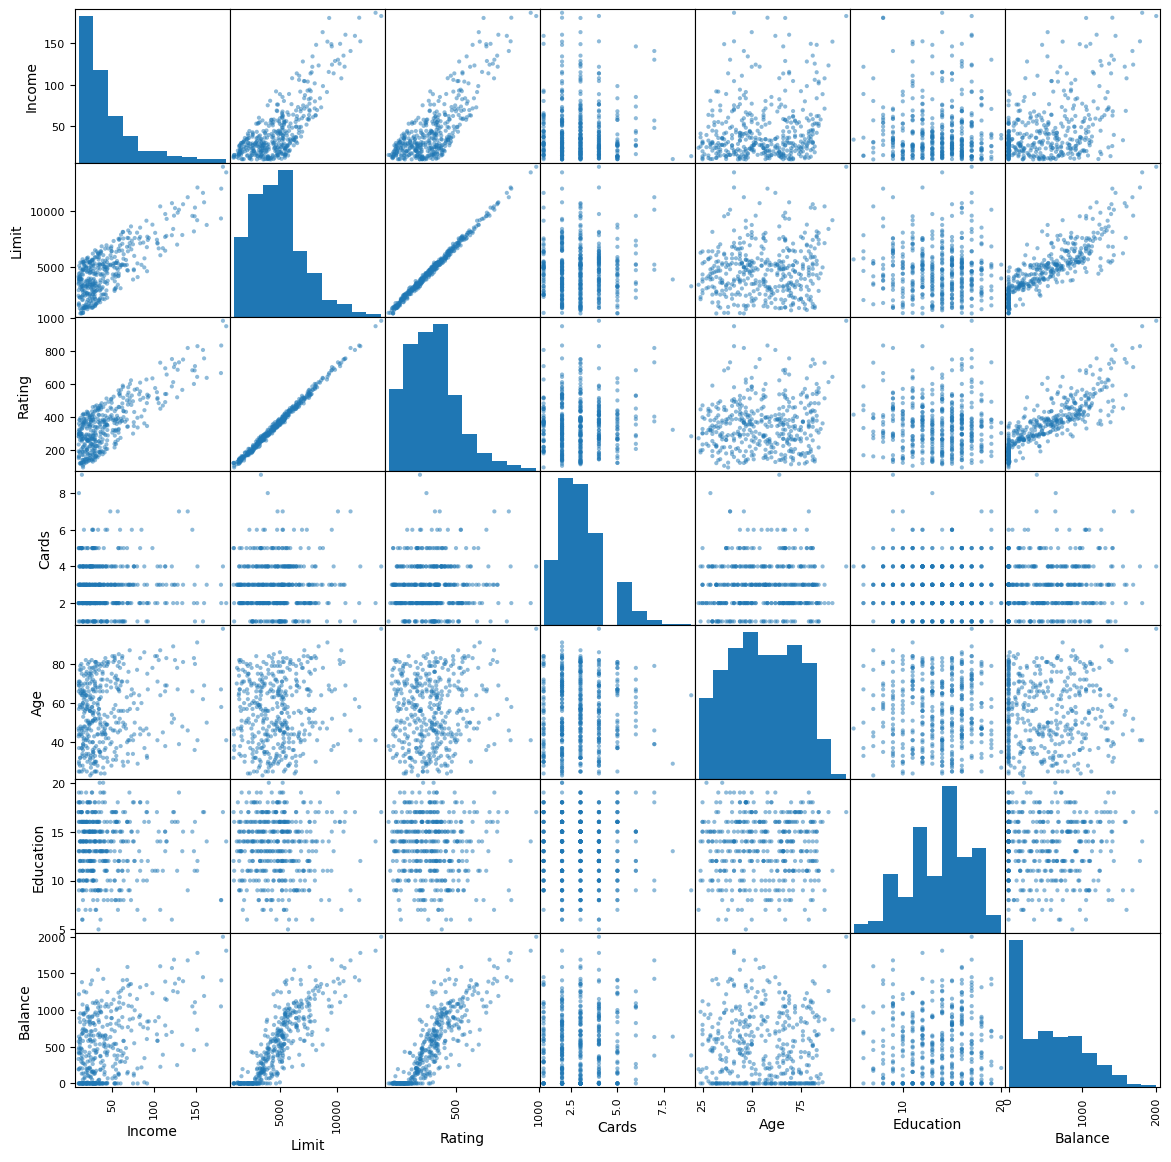

In [65]:
pd.plotting.scatter_matrix(credit, figsize=(14, 14));

***Figure 3.6.*** Each panel of Figure 3.6 is a scatterplot for a pair of variables whose identities are given by the corresponding row and column labels. For example,the scatterplot directly to the right of the word “Balance” depicts balance versus age, while the plot directly to the right of “Age” corresponds to
age versus cards. In addition to these quantitative variables, we also have
four qualitative variables: own (house ownership), student (student status),
status (marital status), and region (East, West or South). 

### Setup for Table 3.7. (Categorical Variables)
Suppose that we wish to investigate differences in credit card balance between those who own a house and those who don’t, ignoring the other variables for the moment. If a qualitative predictor (also known as a *factor*) only has two levels, or possible values, then incorporating it into a regression model is very simple. 

We simply create an **indicator** or **dummy variable** that takes on two possible numerical values. For example, based on the variable `Own`, we can define a new variable:

$$
x_i = 
\begin{cases}
1 & \text{if the $i$th person owns a house} \\\\
0 & \text{if the $i$th person does not own a house}
\end{cases}
\tag{1}
$$

We then use this variable as a predictor in the regression model:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i =
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i & \text{if the $i$th person owns a house} \\\\
\beta_0 + \varepsilon_i & \text{if the $i$th person does not}
\end{cases}
\tag{2}
$$

Here, $\beta_0$ represents the **average credit card balance among non-owners**, $\beta_0 + \beta_1$ is the **average balance among owners**, and $\beta_1$ is the **average difference in balance between owners and non-owners**.


In [66]:
X = MS(['Own']).fit_transform(credit)
y = credit['Balance']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,509.8031,33.128,15.389,0.000
Own[Yes],19.7331,46.051,0.429,0.669


***Table 3.7.*** Displays the coefficient estimates and other information associated with the model. The average credit card debt for non-owners is estimated to be $509.80, whereas owners are estimated to carry $19.73 in additional debt for a total of $509.80 + $19.73 = $529.53. However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance based on house ownership.

### Setup for Table 3.8. (Categorical Variables with More Than 1 Level)

When a qualitative predictor has more than two levels, a single dummy
variable cannot represent all possible values. In this situation, we can create
additional dummy variables. For example, for the **region** variable we create
two dummy variables. The first could be

$$
x_{i1} = 
\begin{cases}
1 & \text{if the $i$th person is from the South} \\\\
0 & \text{if the $i$th person is not from the South,}
\end{cases}
\tag{3}
$$

and the second could be 

$$
x_{i2} = 
\begin{cases}
1 & \text{if the $i$th person is from the West} \\\\
0 & \text{if the $i$th person is not from the West,}
\end{cases}
\tag{4}
$$

Then both of these variables can be used in the regression equation to obtain the model:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \varepsilon_i =
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i & \text{if the $i$th person is from the South} \\\\
\beta_0 + \beta_2 + \varepsilon_i & \text{if the $i$th person is from the West} \\\\
\beta_0 + \varepsilon_i & \text{if the $i$th person is from the East}
\end{cases}
\tag{5}
$$

Here:

- $\beta_0$ represents the **average credit card balance** for individuals from the **East**.
- $\beta_1$ is the **difference** in average balance between people from the **South** and those from the East.
- $\beta_2$ is the **difference** between those from the **West** and the East.

There will always be **one fewer dummy variable than the number of levels**. The level with no dummy variable—**East** in this example—is called the **baseline**.

In [67]:
X = MS(['Region']).fit_transform(credit)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,531.0000,46.319,11.464,0.000
Region[South],-12.5025,56.681,-0.221,0.826
Region[West],-18.6863,65.021,-0.287,0.774


***Table 3.8.*** The estimated balance for the baseline, East,
is $531.00. It is estimated that those in the South will have $18.69 less
debt than those in the East, and that those in the West will have $12.50
less debt than those in the East. However, the p-values associated with the
coefficient estimates for the two dummy variables are very large, suggesting
no statistical evidence of a real difference in average credit card balance
between South and East or between West and East.12 Once again, the
level selected as the baseline category is arbitrary, and the final predictions
for each group will be the same regardless of this choice. However, the
coefficients and their p-values do depend on the choice of dummy variable
coding. Rather than rely on the individual coefficients, we can use an F -test
to test $H_0 : \beta_1 = \beta_2 = 0$; this does not depend on the coding. This F-test has a p-value of 0.96, indicating that we cannot reject the null hypothesis that there is no relationship between balance and region.

### Setup for Table 3.9. (Interaction Term)

One way of extending this model is to include a **third predictor**, called an **interaction term**, which is constructed by multiplying $X_1$ and $X_2$. This gives the model:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \varepsilon
\tag{3.31}
$$

How does the inclusion of this interaction term **relax the additive assumption**?

Note that equation (3.31) can be rewritten as:

$$
Y = \beta_0 + (\beta_1 + \beta_3 X_2) X_1 + \beta_2 X_2 + \varepsilon
\tag{3.32}
$$

Letting:

$$
\tilde{\beta}_1 = \beta_1 + \beta_3 X_2,
$$

we can see that $\tilde{\beta}_1$ is now a **function of $X_2$**. This means that the **effect of $X_1$ on $Y$** depends on the value of $X_2$ — the association between $X_1$ and $Y$ is no longer constant.

Similarly, the effect of $X_2$ on $Y$ also depends on the value of $X_1$. Therefore, the model allows for **interaction between the predictors**, relaxing the assumption that their effects are strictly additive.

We now return to the **Advertising** example. A linear model that uses `radio`, `TV`, and an **interaction** between the two to predict `sales` takes the form:

$$
\text{sales} = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{radio} + \beta_3 \cdot (\text{radio} \times \text{TV}) + \varepsilon
$$

This can be rewritten as:

$$
\text{sales} = \beta_0 + (\beta_1 + \beta_3 \cdot \text{radio}) \cdot \text{TV} + \beta_2 \cdot \text{radio} + \varepsilon
\tag{3.33}
$$

From this form, we can interpret $\beta_3$ as the **change in the effectiveness of TV advertising** associated with a **one-unit increase in radio advertising** — or vice versa.

That is, the **marginal effect** of TV on sales depends on the level of radio advertising, and vice versa, due to the interaction term. This captures a **non-additive** relationship between the two predictors.



In [68]:
X = MS(['TV', 'radio',('TV', 'radio')]).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.7502,0.248000,27.233,0.000
TV,0.0191,0.002000,12.699,0.000
radio,0.0289,0.009000,3.241,0.001
TV:radio,0.0011,0.000052,20.727,0.000


***Table 3.9.*** 
The results in Table 3.9 strongly suggest that the model that includes the interaction term is superior to the model that contains only main effects. The p-value for the interaction term, TV×radio, is extremely low, indicating that there is strong evidence for $H_a: \beta_3 \ne 0$. In other words, it is clear that the true relationship is not additive. The R2 for the model (3.33) is 96.8 %, compared to only 89.7 % for the model that predicts sales using TV and radio without an interaction term. This means that (96.8− 89.7)/(100−89.7) = 69 % of the variability in sales that remains after fitting the additive model has been explained by the interaction term. 

The coefficient estimates in Table 3.9 suggest that an increase in TV advertising of \$1,000 is associated with increased sales of $(\beta_1 + \beta_3 \cdot \text{radio}) \cdot 1{,}000 = 19 + 1.1 \cdot \text{radio}$ units. Similarly, an increase in radio advertising of \$1,000 will be associated with an increase in sales of $(\beta_2 + \beta_3 \cdot \text{TV}) \cdot 1{,}000 = 29 + 1.1 \cdot \text{TV}$ units.


In this example, the p-values associated with TV, radio, and the interaction term all are statistically significant (Table 3.9), and so it is obvious
that all three variables should be included in the model. However, it is
sometimes the case that an interaction term has a very small p-value, but
the associated main effects (in this case, TV and radio) do not. 

The **hierarchical principle** states that if we include an **interaction** in a model, we should also include the **main effects**, even if the $p$-values associated with their coefficients are not significant.

In other words, if the interaction between $X_1$ and $X_2$ appears important, then we should include both $X_1$ and $X_2$ in the model—even if their coefficient estimates have large $p$-values.

The rationale for this principle is that if $X_1 \times X_2$ is related to the response, then whether or not the coefficients of $X_1$ or $X_2$ are exactly zero is of little interest.

Additionally, $X_1 \times X_2$ is typically **correlated** with both $X_1$ and $X_2$, and omitting the main effects can distort or misrepresent the meaning of the interaction term.


### Setup for Fig. 3.7.
Consider the **Credit** data set from Section 3.3.1, and suppose that we wish to predict `balance` using the `income` (quantitative) and `student` (qualitative) variables.

In the absence of an interaction term, the model takes the form:

$$
\text{balance}_i \approx \beta_0 + \beta_1 \cdot \text{income}_i + 
\begin{cases}
\beta_2 & \text{if the } i\text{th person is a student} \\
0 & \text{if not}
\end{cases}
$$

Equivalently, we can write:

$$
\text{balance}_i = 
\begin{cases}
\beta_0 + \beta_2 + \beta_1 \cdot \text{income}_i & \text{if student} \\
\beta_0 + \beta_1 \cdot \text{income}_i & \text{if not}
\end{cases}
$$

This amounts to fitting two **parallel lines** to the data: one for students and one for non-students. The lines differ only in intercept — $\beta_0 + \beta_2$ for students, and $\beta_0$ for non-students — but they share the same slope $\beta_1$.

This implies that the **average effect of income on balance is the same** regardless of student status — a limitation if the income effect differs between the groups.

To address this limitation, we add an **interaction term** by multiplying `income` with the student dummy variable. The model becomes:

$$
\text{balance}_i \approx \beta_0 + \beta_1 \cdot \text{income}_i + 
\begin{cases}
\beta_2 + \beta_3 \cdot \text{income}_i & \text{if student} \\
0 & \text{if not}
\end{cases}
$$

Which simplifies to:

$$
\text{balance}_i = 
\begin{cases}
(\beta_0 + \beta_2) + (\beta_1 + \beta_3) \cdot \text{income}_i & \text{if student} \\
\beta_0 + \beta_1 \cdot \text{income}_i & \text{if not}
\end{cases}
$$

Now, both the **intercept and slope** vary depending on student status, allowing the model to capture differences in how income affects balance for students versus non-students.


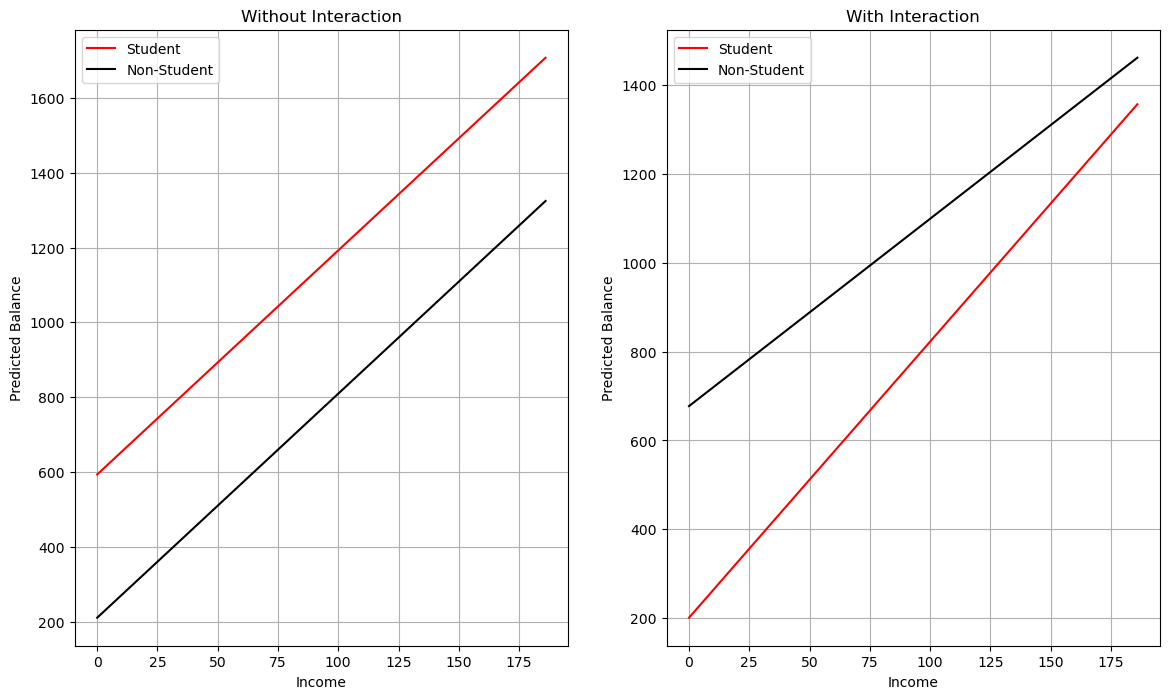

In [69]:
# without interaction term 
X1 = MS(['Income', 'Student']).fit_transform(credit)
# with interaction term 
X2 = MS(['Income', 'Student', ('Income', 'Student')]).fit_transform(credit)
y = credit['Balance']
income = np.arange(0, credit['Income'].max())
model1 = sm.OLS(y, X1)
results1 = model1.fit()
balance1_s = results1.params.iloc[0] + results1.params.iloc[1] * income + results1.params.iloc[2]
balance1_ns = results1.params.iloc[0] + results1.params.iloc[1] * income
model2 = sm.OLS(y, X2)
results2 = model2.fit()
balance2_s = results2.params.iloc[0] + results2.params.iloc[1] * income 
balance2_ns = (results2.params.iloc[0] + results2.params.iloc[2]) + (results2.params.iloc[1] + results2.params.iloc[3]) * income 
fig, ax = subplots(ncols=2, figsize=(14, 8))
# Store all balances in a dict of tuples for clarity
balances = {
    0: (balance1_s, balance1_ns),  # left plot: no interaction
    1: (balance2_s, balance2_ns)   # right plot: with interaction
}
titles = ['Without Interaction', 'With Interaction']
for i in range(len(ax)): 
    s, ns = balances[i]
    ax[i].plot(income, s, color='red', label='Student')
    ax[i].plot(income, ns, color='black', label='Non-Student')
    ax[i].set_xlabel('Income')
    ax[i].set_ylabel('Predicted Balance')
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].grid(True)


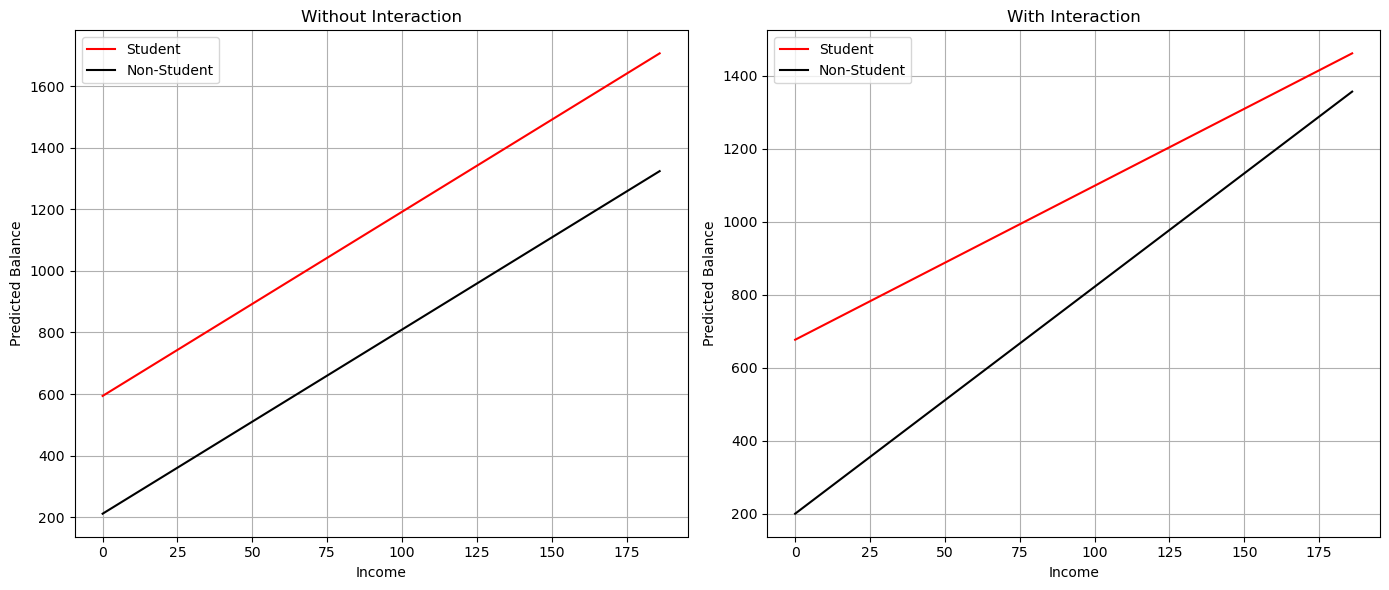

In [74]:
# More cleaned up, modular code: 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

#--- Helper to fit model and return predicts ---
def predict_balance(params, income, interaction=False): 
    beta0, beta1 = params.iloc[0], params.iloc[1]

    if interaction: 
        beta2, beta3 = params.iloc[2], params.iloc[3]
        balance_student = (beta0 + beta2) + (beta1 + beta3) * income 
        balance_nonstudent = beta0 + beta1 * income 
    else: 
        beta2 = params.iloc[2]
        balance_student = beta0 + beta1 *income + beta2 
        balance_nonstudent = beta0 + beta1 * income 

    return balance_student, balance_nonstudent 

#--- Model Setup ---
y = credit['Balance']
income = np.arange(0, credit['Income'].max())

# Model without interaction 
X1 = MS(['Income', 'Student']).fit_transform(credit)
results1 = sm.OLS(y, X1).fit()
balance1_s, balance1_ns = predict_balance(results1.params, income, interaction=False)

# Model with interaction 
X2 = MS(['Income', 'Student', ('Income', 'Student')]).fit_transform(credit)
results2 = sm.OLS(y, X2).fit()
balance2_s, balance2_ns = predict_balance(results2.params, income, interaction=True)

#--- Plotting ---
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
titles = ['Without Interaction', 'With Interaction']
predictions = [(balance1_s, balance1_ns), (balance2_s, balance2_ns)]

for ax, title, (s_pred, ns_pred) in zip(axes, titles, predictions): 
    ax.plot(income, s_pred, color='red', label = 'Student')
    ax.plot(income, ns_pred, color='black', label = 'Non-Student')
    ax.set_xlabel('Income')
    ax.set_ylabel('Predicted Balance')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

***Figure 3.7.*** For the Credit data, the least squares lines are shown for prediction of balance from income for students and non-students. Left: There is no interaction between income and student. Right: There is an interaction term between income and student.

### Setup for Figure 3.8: Non-linear Relationships: 

A simple way to extend the linear model to accomodate non-linear relationships is to use *polynomial regression*. Consider Figure 3.8, in which the mpg (gas mileage in miles per gallon) versus horsepower is shown for a number of cars in the Auto data set. The orange line represents the linear regression fit. There is a pronounced relationship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship. For example, the points in Figure 3.8 seem to have a quadratic shape, suggesting that a model of the quadratic form:

$\text{mpg} = \beta_0 + \beta_1 \times \text{horsepower} + \beta_2 \times \text{horsepower}^2 + \epsilon$

This is still a *linear model*, simply a multiple regression model with $X_1=\text{horsepower}$ and $X_2 = \text{horsepower}^2$. Therefore, we can use standard linear regression methods to estimate $\beta_0$, $\beta_1$, and $\beta_2$ to produce a non-linear fit. 

In [56]:
from pathlib import Path 
import pandas as pd
path_to_data = Path.cwd() / 'data'
file = 'Auto.csv'
auto = pd.read_csv(path_to_data/file, na_values=['?'])
auto = auto.dropna()
auto.shape

(392, 9)

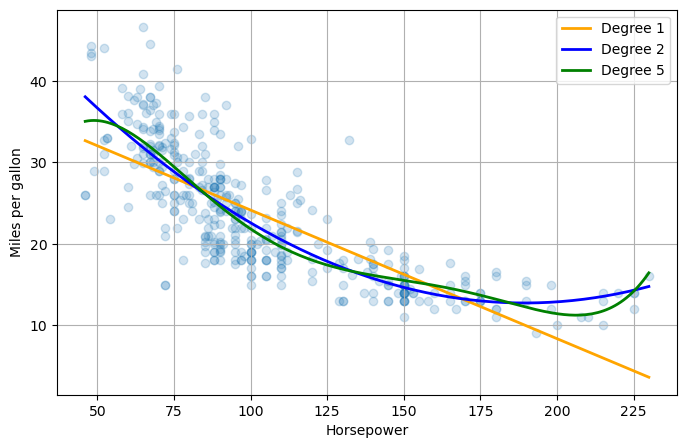

In [73]:
import numpy as np 
import statsmodels.api as sm 
import pandas as pd 
import matplotlib.pyplot as plt 
X = auto['horsepower']
y = auto['mpg']

X1 = MS(['horsepower']).fit_transform(auto)
results1 = sm.OLS(y, X1).fit()
B0, B1 = results1.params

# Need the raw=True since without we get an orthoginal basis that's different
X2 = MS([poly('horsepower', 2, raw=True)]).fit_transform(auto)
results2 = sm.OLS(y, X2).fit()
C0, C1, C2 = results2.params 

X3 = MS([poly('horsepower', 5, raw=True)]).fit_transform(auto)
results3 = sm.OLS(y, X3).fit()
D0, D1, D2, D3, D4, D5 = results3.params

# Create a grid of the feature alues for plotting 
feat = np.linspace(X.min(), X.max(), 200)

# Estimate response using feature grid values and ls coefficients
y1_est = B0 + B1 * feat
y2_est = C0 + C1 * feat + C2 * feat**2 
y3_est = D0 + D1 * feat + D2 * feat**2 + D3 * feat**3 + D4 * feat**4 + D5 * feat**5 
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y, alpha=0.2)
ax.plot(feat, y1_est, color='orange', lw=2, label='Degree 1')
ax.plot(feat, y2_est, color='blue', lw=2, label='Degree 2')
ax.plot(feat, y3_est, color='green', lw=2, label='Degree 5')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per gallon')
ax.legend()
ax.grid(True)
plt.show()

***Figure 3.8.*** The Auto data set. For number of cars, mpg and $\text{horsepower}$ are shown, the linear regression fir is show in orange. The linear regression fit that includes $\text{horsepower}^2$ is shown in blue. The linear regression fit for a model with a fifth degress is shown in green. 

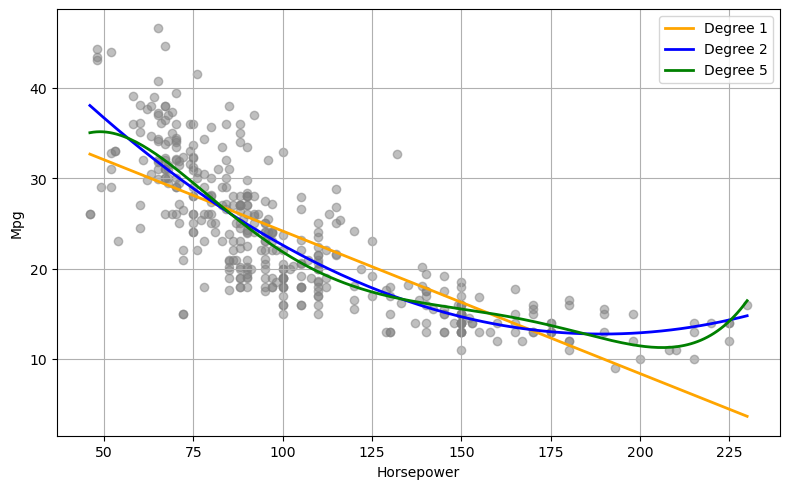

In [76]:
# More modular version of the above code ... 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from ISLP       import load_data
from ISLP.models import ModelSpec as MS, poly

# 1) Load & clean
auto = load_data('Auto').dropna(subset=['horsepower','mpg'])

# 2) Fit‐and‐transform helper
def fit_ols(df, spec, target):
    ms = MS(spec)               # new ModelSpec
    X  = ms.fit_transform(df)   # fit it once
    y  = df[target]
    ols = sm.OLS(y, X).fit()
    return ms, ols              

# 3) Predict only (no refit!)
def predict_on_grid(ms, ols, feature, df, grid_size=200):
    xmin, xmax = df[feature].min(), df[feature].max()
    x_grid = np.linspace(xmin, xmax, grid_size)
    df_feat = pd.DataFrame({feature: x_grid})
    
    X_new = ms.transform(df_feat)   # transform, not fit_transform
    y_pred = ols.predict(X_new)
    return x_grid, y_pred

# 4) Plotting wrapper
def plot_polys(df, feature, target, specs, labels, colors):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(df[feature], df[target], color='gray', alpha=0.5)
    
    for spec, label, color in zip(specs, labels, colors):
        ms, ols      = fit_ols(df, spec, target)
        xg, yg       = predict_on_grid(ms, ols, feature, df)
        ax.plot(xg, yg, color=color, lw=2, label=label)
    
    ax.set(xlabel=feature.capitalize(),
           ylabel=target.capitalize())
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# 5) Your specs, labels, colors
specs  = [
    ['horsepower'],
    [ poly('horsepower', 2) ],
    [ poly('horsepower', 5) ]
]
labels = ['Degree 1','Degree 2','Degree 5']
colors = ['orange','blue','green']

# 6) Finally—make the plot
plot_polys(auto, 'horsepower', 'mpg', specs, labels, colors)


In [77]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,56.9001,1.800,31.604,0.0
"poly(horsepower, degree=2, raw=True)[0]",-0.4662,0.031,-14.978,0.0
"poly(horsepower, degree=2, raw=True)[1]",0.0012,0.000,10.080,0.0


***Table 3.10*** For the Auto data set, least squares coefficients estimates associated with the regression of *mpg* and *horsepower*. 

The blue curve in Figure 3.8 shows the resulting quadratic fit to the data. The quadratic fit is a substantially better fit than just using the linear term. The $R^2$ of the quadratic fit is $0.688$ compared to the linear fit of $0.606$ for the linear fit, and the p-value in Table 3.10 for quadratic term is highly significant. 

If including $\text{horsepower}^2$ led to such a big improvement in the model, why not include $\text{horsepower}^3$, $\text{horsepower}^4$, or even $\text{horsepower}^5$? The green curve in Figure 3.8 displays the fit that results from including all polynomials up to fifth degree in the model. The resulting fit seems unnecessarily wiggly—that is, it is unclear that including the additional terms really has led to a better fit to the data.

### Potential Problems ###

#### 1. Non-linearity of Data ####

Residual plots are a useful graphical tool for identifying non-linearity. Given a simple linear regression model, we can plot the residuals, $e_i =\hat{y}_i−y_i$, versus the predictor $x_i$. In the case of a multiple regression model, since there are multiple predictors, we instead plot the residuals versus the predicted (or fitted) values $\hat{y}_i$. Ideally, the residual plot will show no fitted discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model.

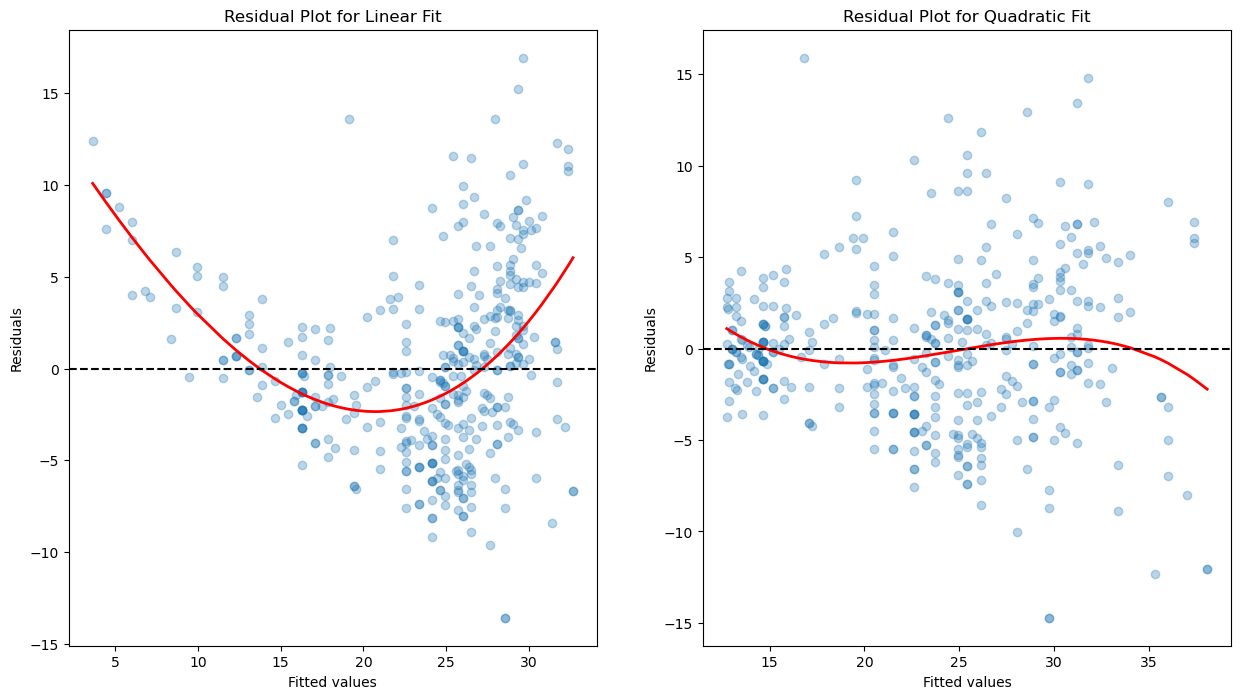

In [100]:
#y_hat1, resid1 = results1.fittedvalues, results1.resid
#y_hat2, resid2 = results2.fittedvalues, results2.resid 
# Create 2 dataframes for your linear and degree 3 fit. 
df1 = pd.DataFrame({'fitted': results1.fittedvalues, 
                   'resid': results1.resid})
df2 = pd.DataFrame({'fitted': results2.fittedvalues, 
                   'resid': results2.resid})

# Fit cubic polynomial on "smooth" (yhat, resid)
f1_smooth = MS([poly('fitted', 3)]).fit_transform(df1)
f2_smooth = MS([poly('fitted', 3)]).fit_transform(df2)

# Here the response data will be residuals and the input is fittedvalues
fit1_smooth = sm.OLS(df1['resid'], f1_smooth).fit()
fit2_smooth = sm.OLS(df2['resid'], f2_smooth).fit()

# Get the smoothed residual predictions at the training points 
pred1_smooth = fit1_smooth.fittedvalues
pred2_smooth = fit2_smooth.fittedvalues 

# Get the sort permutation of the fitted values 
order1 = np.argsort(results1.fittedvalues)
order2 = np.argsort(results2.fittedvalues)

# Apply this order to both arrays 
y_hat1_sorted = results1.fittedvalues.values[order1]
pred1_smooth_sorted = pred1_smooth.values[order1]
y_hat2_sorted = results2.fittedvalues.values[order2]
pred2_smooth_sorted = pred2_smooth.values[order2]

fig, ax = plt.subplots(ncols=2, figsize=(15, 8))
ax[0].scatter(results1.fittedvalues, results1.resid, alpha=0.3)
ax[0].plot(y_hat1_sorted, pred1_smooth_sorted, color='red', lw=2)
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residual Plot for Linear Fit')
ax[0].axhline(0, color='k', ls='--')
ax[1].scatter(results2.fittedvalues, results2.resid, alpha=0.3)
ax[1].plot(y_hat2_sorted, pred2_smooth_sorted, color='red', lw=2)
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residual Plot for Quadratic Fit')
ax[1].axhline(0, color='k', ls='--');



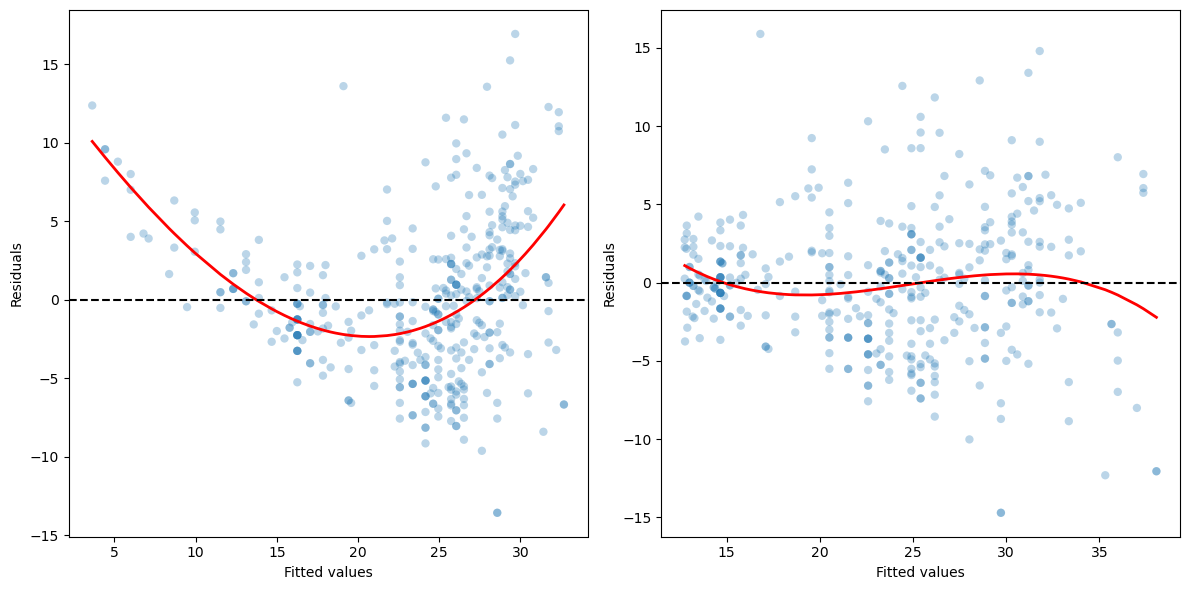

In [ ]:
# assume results1 and results2 already exist
results = [results1, results2]

nrows, ncols = 1, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6))

for ax, fit in zip(axes, results):
    # Put the fitted and residual on the 
    df = pd.DataFrame({
        'fitted': fit.fittedvalues,
        'resid':   fit.resid
    })

    # Sort the index by fitted 
    df = df.sort_values('fitted').reset_index(drop=True)

    # Build a cubic basis on the sorted values, fit that to the sorted residuals
    X_smooth = MS([poly('fitted', 3)]).fit_transform(df)
    smooth_fit = sm.OLS(df['resid'], X_smooth).fit()
    df['resid_smooth'] = smooth_fit.fittedvalues

    # 4) now plot
    ax.scatter(df['fitted'], df['resid'], alpha=0.3, edgecolors='none')
    ax.plot(df['fitted'], df['resid_smooth'], color='red', lw=2)
    ax.axhline(0, ls='--', color='k')
    ax.set(xlabel='Fitted values', ylabel='Residuals')

plt.tight_layout()
plt.show()

***Figure 3.9.*** Plots of residuals versus predicted (or fitted) values for the Auto data set. In each plot, the red line is a smooth fit to the residuals, intended to make it easier to identify a trend. Left: A linear regression of mpg on horsepower. A strong pattern in the residuals indicates non-linearity in the data. Right: A linear regression of $\text{mpg}$ on $\text{horsepower}$ and $\text{horsepower}^2$. There is little pattern in the residuals.

The left panel of Figure 3.9 displays a residual plot from the linear regression of $\text{mpg}$ onto $\text{horsepower}$ on the Auto data set that was illustrated in Figure 3.8. The red line is a smooth fit to the residuals, which is displayed in order to make it easier to identify any trends. The residuals exhibit a clear U-shape, which provides a strong indication of non-linearity in the data.

In contrast, the right-hand panel of Figure 3.9 displays the residual plot
that results from the model, which contains a quadratic term. There
appears to be little pattern in the residuals, suggesting that the quadratic
term improves the fit to the data. If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $\log{X}$, $\sqrt{X}$, and $X^2$, in the regression model. 

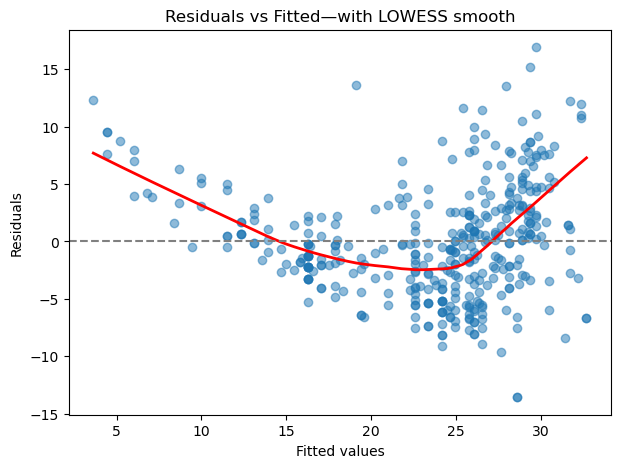

In [115]:
# We can also use lowess smoother, here's a minimal example

# Fit your model
auto = load_data( 'Auto' )
ms  = MS(['horsepower'])               # simple linear
X   = ms.fit_transform(auto)           # fits intercept + basis
y   = auto['mpg']
ols = sm.OLS(y, X).fit()

# Get fitted + residuals
fitted = ols.fittedvalues
resid   = ols.resid

# Compute a LOWESS‐smoothed curve
lowess  = sm.nonparametric.lowess
smth    = lowess(resid, fitted, frac=0.6)   # frac controls smoothing span

# Plot
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(fitted, resid, alpha=0.5)
ax.plot(smth[:,0], smth[:,1], color='red', lw=2)
ax.axhline(0, linestyle='--', color='gray')
ax.set(xlabel='Fitted values', ylabel='Residuals',
       title='Residuals vs Fitted—with LOWESS smooth')
plt.show()


### 2. Correlation of Error Terms ###
Linear regression assumes that the error terms, $\epsilon_1$, $\epsilon_2$, . . . , $\epsilon_n$, are uncorrelated. This means if $\epsilon_i$ is positive then this provides little or no information about the sign of $\epsilon_{i+1}$. The standard errors that are computed for the estimated regression coefficients or the fitted values are based on the assumption of uncorrelated error terms. If in fact there is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confidence and
prediction intervals will be narrower than they should be. For example,
a 95% confidence interval may in reality have a much lower probability
than 0.95 of containing the true value of the parameter. In addition, p-
values associated with the model will be lower than they should be; this
could cause us to erroneously conclude that a parameter is statistically
significant.

Such correlations frequently occur in the context of time series data, which consists of observations for which measurements are obtained at discrete points in time. In many cases, observations that are obtained at adjacent time points will have positively correlated errors. In order to determine if this is the case for a given data set, we can plot the residuals from our model as a function of time. On the other hand, if the error terms are positively correlated, then we may see tracking in the residuals—that is, adjacent residuals may have tracking
similar values.

Many methods have been developed to properly take account of corre-
lations in the error terms in time series data. In general, the
assumption of uncorrelated errors is extremely important for linear regres-
sion as well as for other statistical methods, and good experimental design
is crucial in order to mitigate the risk of such correlations.

### 3. Non-constant Variance of Error Terms ### 

Another assumption of linear regression is the error terms have constant variance $\text{Var}(\epsilon_i) = \sigma^2$. The standard errors, confidence intervals, and hypothsese tests associated with linear model rely on this assumption. 

The variances of the error terms may increase with the value of the response. One can identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in the residual plot. An example is when the magnitude of the residuals tends to increase with the fitted values. When faced with this problem, one possible solution is to transform the response $Y$ using a concave function such as $\log{Y}$ or $\sqrt{Y}$ . Such a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity.

Sometimes we have a good idea of the variance in each response. If the $i\text{th}$ response could be the average of $n$ raw observations and if each of these raw observations is uncorrelated with variance $\sigma^2$, then their average has a variance $\frac{\sigma_i^2}{n_i}$. The simple remedy is to fit out model using ***weighted least squares*** with the weights proportional to the inverse variances or $w_i = n_i$ in this case. 

### 4. Outliers ###

An ***outlier*** is a point for which $y_i$ is far from the value predicated by the model. Residuals plots can be helpful in identifying outliers. In practice, it can be dificult to decide how large a residual needs to be before we conclude the point is a outlier. We can instead plot the ***studentized residuals***, which is computed by dividing each residual $e_i$ by its estimated standard error. Observations whose studentized residuals are greater than 3 in aobsilute values are possible outliers. If we believe that an outlier has occurred due to an error in data collection or recording, then one solution is to simply remove the observation. However, care should be taken, since an outlier may instead indicate a deficiency with the model, such as a missing predictor.

### 5. High Leverage Points ###

Outliers are observations for which the response $y_i$ is unusual given a predictor $x_i$. In contrast, observations with ***high leverage** have an unusual value for $x_i$. High leverage observations tend to have a high impact on the estimated regression line. A couple of these observations may invalidate the entire fit and so it's important to identify the high leverage observations. In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. But in a multiple linear regression with many predictors, it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors. In order to quantify an observation's leverage, we can compute the ***leverage statistic***. A large leverage statistic indicates an observation with high leverage. For simple linear regression 

$$h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{i'=1}^n(x_{i'} - \bar{x})^2}.$$

It's clear that $h_i$ increases with the distance of $x_i$ from $\bar{x}$. The leverage state $h_i$ is always between $\frac{1}{n}$ and 1, and the average leverage for all the observations is always $\frac{p+1}{n}$. If a leverage statistic greatly exceeds $\frac{p+1}{n}$, then we may suspect that the corresponding point has high leverage. 

### 6. Collinearity ###

***Collinearity*** is the situation when two or more predictor variables are closely related to each other. The presence of collinearity can be a problem in the regression context, since it's can then be difficult to separate out the individual effects of collinear variables on the response. 

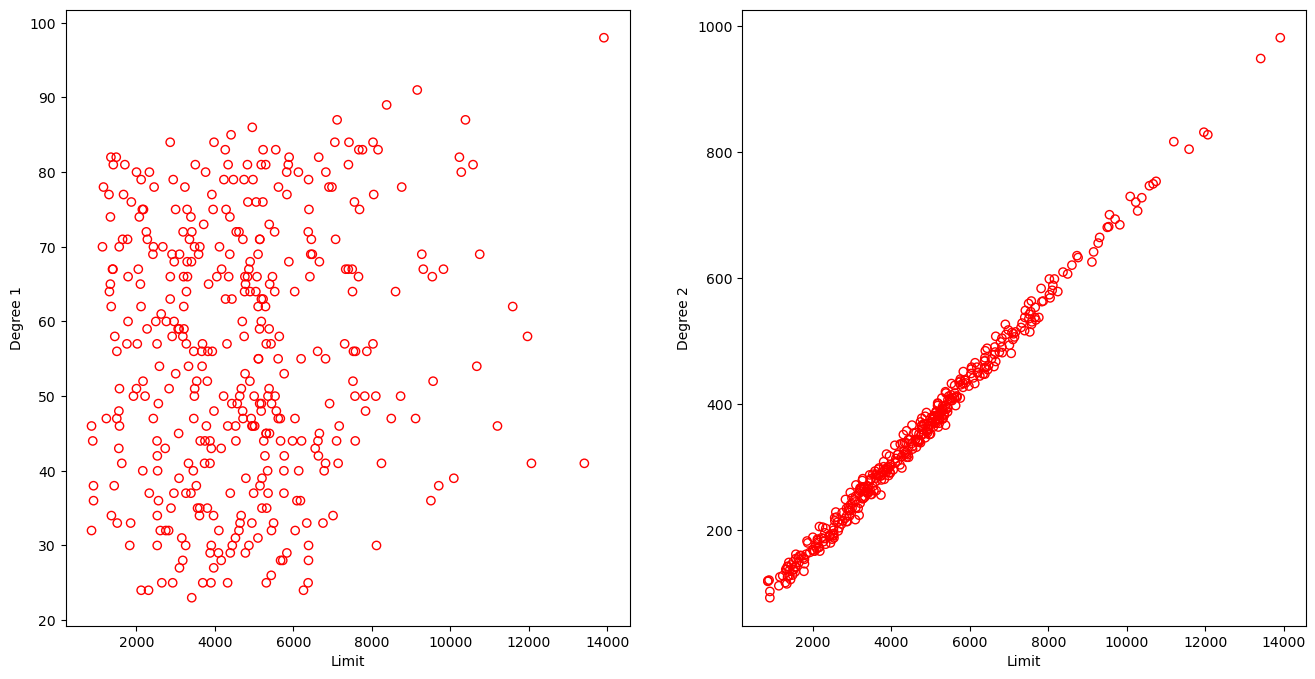

In [129]:
credit = load_data('Credit')
x1, x2, x3 = credit['Limit'], credit['Age'], credit['Rating']
xi = [x2, x3]
ylabels = ['Age', 'Rating']
nrows, ncols = 1, 2
fig, ax = subplots(nrows, ncols, figsize=(16,8))
for i in range(ncols): 
    ax[i].scatter(x1, 
                xi[i],
                color='red', 
                facecolors='none')
    ax[i].set_xlabel('Limit')
    ax[i].set_ylabel(labels[i])


***Figure 3.14*** Scatterplots of the observations from the Credit data set. Left:A plot of age versus limit. These two variables are not collinear. Right: A plot of rating versus limit. There is high collinearity.

In the left-hand panel of Figure 3.14, the two predictors limit and age appear to have no obvious relationship. In contrast, in the right-hand panel of Figure 3.14, the predictors limit and rating are very highly correlated with each other, and we say that they are collinear. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. In other words, since limit and rating tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response, balance.

In [2]:
from pathlib import Path 
path_to_data = Path.cwd() / 'data'
file = 'Credit.csv'
credit = pd.read_csv(path_to_data/file)
y = credit['Balance']
X1 = MS(['Age', 'Limit']).fit_transform(credit)
# Regression of 'Balance' onto 'Age' and 'Limit' 
results1 = sm.OLS(y, X1).fit()
X2 = MS(['Rating', 'Limit']).fit_transform(credit)
# Regression of 'Balance' onto 'Rating' and 'Limit' 
results2 = sm.OLS(y, X2).fit()
print(results1.params)
print(results2.params)


intercept   -173.410901
Age           -2.291486
Limit          0.173365
dtype: float64
intercept   -377.536795
Rating         2.201672
Limit          0.024514
dtype: float64


Contour plots of the residual sum of squares (RSS) as functions of regression coefficients, specifically $\beta_1$ and $\beta_2$ , with the intercept $\beta_0$ optimized out. To create such a contour plot we need to 
1. Define a grid over $\beta_1$ and $\beta_2$ values. 
2. For each pair $(\beta_1, \beta_2)$ compute the optimal $\beta_0$ that minimizes the $RSS$.
3. Calculate the $RSS$ for each $(\beta_1, \beta_2)$ pair using $\beta_0$  
4. Plot the contours of RSS over $(\beta_1, \beta_2)$. 

The sum of squares residuals is: 21098589.345243543
Therefore, we need to use the following scale: 1000000


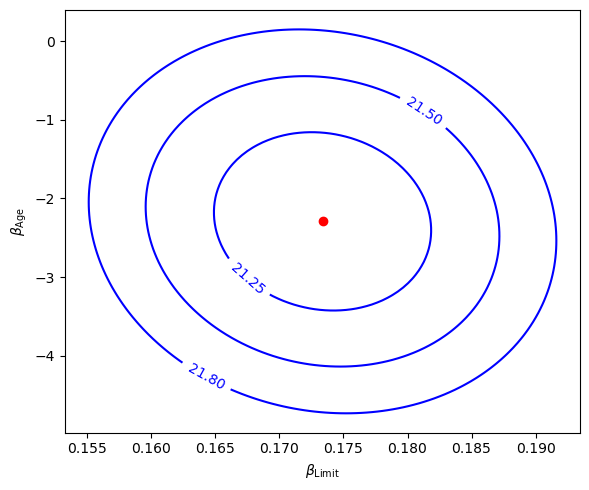

In [74]:
import numpy as np
import matplotlib.pyplot as plt

y_arr = np.asarray(y)
x1 = X1.values[:, 1]   # predictor “age”
x2 = X1.values[:, 2]   # predictor “limit”

# Compute sample means
y_mean  = y_arr.mean()
x1_mean = x1.mean()
x2_mean = x2.mean()

# Get the OLS estimates for slopes
b1_est = results1.params.iloc[1]
b2_est = results1.params.iloc[2]

# Get their standard errors 
se1 = results1.bse.iloc[1]
se2 = results1.bse.iloc[2]

# Define a grid of +/- x SE around each estimate 
N = 100
b1_range = np.linspace(b1_est - 4*se1, b1_est + 4*se1, N)
b2_range = np.linspace(b2_est - 4*se2, b2_est + 4*se2, N)
B1, B2   = np.meshgrid(b1_range, b2_range, indexing='xy')

# Profile out the intercept analytically for each (b1,b2)
B0 = y_mean - B1 * x1_mean - B2 * x2_mean    # shape: (N,N)

# Compute predicted y over that 2D grid
#    y_hat shape: (n_samples, N, N)
y_hat = (
    B0[None, :, :] +
    x1[:, None, None] * B1[None, :, :] +
    x2[:, None, None] * B2[None, :, :]
)

# Compute RSS at each grid point
#    rss shape: (N, N)
rss_raw = np.sum((y_arr[:, None, None] - y_hat)**2, axis=0)
# scale_hack = 1000000
# rss = rss_raw / scale_hack

# ISLR plots the raw RSS in millions of dollars
# A systematic way to get the scaling factor is 
# Find the sum of squares residuals for your model 
ssr = results1.ssr 
print("The sum of squares residuals is:", ssr)
# Then choose a power of ten so that ssr/scale is a "nice" 2-digit number
p = int(np.floor(np.log10(ssr)))
# For 2-digit axis labels subtract by 1 
scale = 10**(p-1)
print("Therefore, we need to use the following scale:", scale)
rss = rss_raw / scale

# 2D contour (limit on x, age on y)
plt.figure(figsize=(6,5))
cs = plt.contour(B2, B1, rss, levels=[21.25, 21.5, 21.8], colors='blue')
plt.clabel(cs, inline=True)
plt.scatter(b2_est, b1_est, color='red', label='OLS Est.')
plt.xlabel(r'$\beta_{\text{Limit}}$')
plt.ylabel(r'$\beta_{\text{Age}}$')
plt.tight_layout()
plt.show();


***Figure 3.15.*** Contour plots for the RSS values as a function of the parameters \beta for various regressions involving the Credit data set. In each plot, the black dots represent the coefficient values corresponding to the minimum RSS. A contour plot of RSS for the regression of balance onto age and limit. The minimum value is well defined. 

Above we have a contour plot of the RSS associated with different possible coefficient estimates for the regression of balance on limit and age. Each ellipse represents a set of coefficient that correspond to the same RSS, with the ellipses nearest to the center taking on the lowest value of RSS. The red dots represent the coefficient estimates that results in the smallest possible RSS (the least squares estimates). The axes for
limit and age have been scaled so that the plot includes possible coeffi-
cient estimates that are up to four standard errors on either side of the
least squares estimates. Thus the plot includes all plausible values for the
coefficients. For example, we see that the true limit coefficient is almost
certainly somewhere between 0.15 and 0.20.

In [70]:
%whos

Variable       Type                        Data/Info
----------------------------------------------------
Axes3D         type                        <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
B0             ndarray                     100x100: 10000 elems, type `float64`, 80000 bytes
B1             ndarray                     100x100: 10000 elems, type `float64`, 80000 bytes
B1_2d          ndarray                     40x40: 1600 elems, type `float64`, 12800 bytes
B2             ndarray                     100x100: 10000 elems, type `float64`, 80000 bytes
B2_2d          ndarray                     40x40: 1600 elems, type `float64`, 12800 bytes
MS             type                        <class 'ISLP.models.model_spec.ModelSpec'>
N              int                         100
Path           type                        <class 'pathlib.Path'>
VIF            function                    <function variance_inflat<...>on_factor at 0x14c529040>
X1             DataFrame                        i

The sum of squares residuals is: 21427162.196908075
Therefore, we need to use the following scale: 1000000


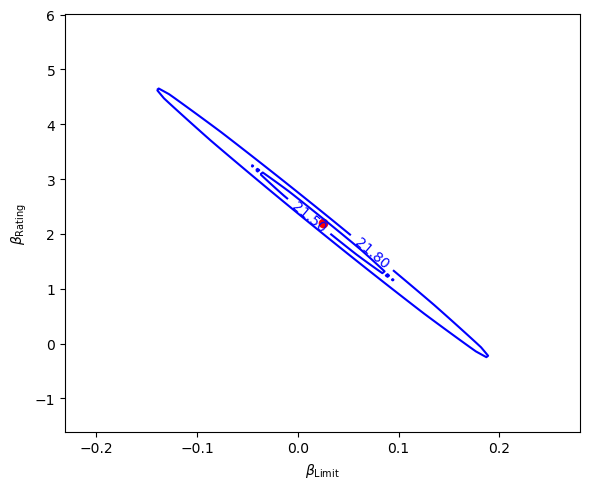

In [75]:
x1 = X2.values[:, 1]
x2 = X2.values[:, 2]

x1_mean = x1.mean()
x2_mean = x2.mean()

b1_est = results2.params.iloc[1]
b2_est = results2.params.iloc[2]

se1 = results2.bse.iloc[1]
se2 = results2.bse.iloc[2]

# Define a grid of +/- x SE around each estimate 
N = 100
b1_range = np.linspace(b1_est - 4*se1, b1_est + 4*se1, N)
b2_range = np.linspace(b2_est - 4*se2, b2_est + 4*se2, N)
B1, B2   = np.meshgrid(b1_range, b2_range, indexing='xy')

B0 = y_mean - B1 * x1_mean - B2 * x2_mean   # shape (n, n)

y_hat= (
    B0[None, :, :] +
    x1[:, None, None] * B1[None, :, :] +
    x2[:, None, None] * B2[None, :, :]
)

# Compute RSS at each grid point
#    rss shape: (N, N)
rss_raw = np.sum((y_arr[:, None, None] - y_hat)**2, axis=0)
# scale_hack = 1000000
# rss = rss_raw / scale_hack

# ISLR plots the raw RSS in millions of dollars
# A systematic way to get the scaling factor is 
# Find the sum of squares residuals for your model 
ssr = results2.ssr 
print("The sum of squares residuals is:", ssr)
# Then choose a power of ten so that ssr/scale is a "nice" 2-digit number
p = int(np.floor(np.log10(ssr)))
# For 2-digit axis labels subtract by 1 
scale = 10**(p-1)
print("Therefore, we need to use the following scale:", scale)
rss = rss_raw / scale

# 2D contour (limit on x, age on y)
plt.figure(figsize=(6,5))
cs = plt.contour(B2, B1, rss, levels=[21.25, 21.5, 21.8], colors='blue')
plt.clabel(cs, inline=True)
plt.scatter(b2_est, b1_est, color='red', label='OLS Est.')
plt.xlabel(r'$\beta_{\text{Limit}}$')
plt.ylabel(r'$\beta_{\text{Rating}}$')
plt.tight_layout()
plt.show();

***Figure 3.15*** 
A contour plot of RSS for the regression of balance onto rating and limit. Because of the collinearity, there are many pairs $(\beta_{\text{Limit}}, \beta_{\text{Rating}})$ with a similar value for RSS.

The contours above run along a narrow valley; there is a broad range of
values for the coefficient estimates that result in equal values for RSS.
Hence a small change in the data could cause the pair of coefficient values
that yield the smallest RSS — that is, the least squares estimates — to move
anywhere along this valley. This results in a great deal of uncertainty in the coefficient estimates. Notice that the scale for the limit coefficient now runs from roughly −0.2 to 0.2; this is an eight-fold increase over the plausible range of the limit coefficient in the regression with age. Interestingly, even though the limit and rating coefficients now have much more individual uncertainty, they will almost certainly lie somewhere in this contour valley. For example, we would not expect the true value of the limit and rating coefficients to be −0.1 and 1 respectively, even though such a value is plausible for each coefficient individually.

Since collinearity reduces the accuracy of the estimates of the regression
coefficients, it causes the standard error for $\hat{\beta}_j$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta}_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject $H_0 : \beta_j = 0$. This means that the power of the hypothesis test — the probability of correctly power  detecting a non-zero coefficient — is reduced by collinearity.

In [82]:
summarize(results1)

,coef,std err,t,P>|t|
intercept,-173.4109,43.828,-3.957,0.000
Age,-2.2915,0.672,-3.407,0.001
Limit,0.1734,0.005,34.496,0.000


In the first model both age and limit are highly significant with very small p-values. 

In [84]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,-377.5368,45.254,-8.343,0.000
Rating,2.2017,0.952,2.312,0.021
Limit,0.0245,0.064,0.384,0.701


In the second, the collinearity between limit and rating has caused
the standard error for the limit coefficient estimate to increase by a factor of 12 and the p-value to increase to 0.701. In other words, the importance of the limit variable has been masked due to the presence of collinearity. To avoid such a situation, it is desirable to identify and address potential collinearity problems while fitting the model.

In situations when we have multicollinearity i.e. collinearity to exist between three or more variables even if no pair has a particularly high correlation. A way to assess this is to compute the ***variance inflation factor*** (VIF). The VIF is the ratio of the variance of $\hat{\beta}_j$ when fitting the full model divided by the variance of $\hat{\beta}_j$ if fit on its own. The smallest possible value for VIF is 1 which indicate complete lack of collinearity. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. The VIF for each variable can be computed using 

$$VIF(\hat{\beta}_j) = \frac{1}{1 - R_{X_j|X_{-j}}^2}$$

where $R_{X_j|X_{-j}}^2$ is the $R^2$ from a regressioin of $X_j$ onto all of the other predictors. If $R_{X_j|X_{-j}}^2$ is close to one, then collinearity is present, so VIF will be large. 


In [90]:
# Response 
y = credit['Balance']
# Drop response column 
credit_new = credit.drop(columns='Balance')
# Fit and transfrom data 
X = MS(['Age', 'Rating', 'Limit']).fit_transform(credit_new)
# Calculate VIF for each 'age', 'rating', and 'limit' 
vals = [VIF(X, i) 
        for i in range(1, X.shape[1])]
# exclude the intercept column 
vif = pd.DataFrame({'vif':vals}, 
                   index = X.columns[1:])
vif

,vif
Age,1.011385
Rating,160.668301
Limit,160.592880


In the Credit data, a regression of balance on age, rating, and limit
indicates that the predictors have VIF values of 1.01, 160.67, and 160.59.
As we suspected, there is considerable collinearity in the data!

#### How To Deal With Collinearity! ####

When faced with the problem of collinearity, there are two simple solu-
tions. The first is to drop one of the problematic variables from the regression. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables. For instance, if we regress balance onto age and limit,without the rating predictor, then the resulting VIF values are close to the minimum possible value of 1, and the R2 drops from 0.754 to 0.75.
So dropping rating from the set of predictors has effectively solved the
collinearity problem without compromising the fit. The second solution is
to combine the collinear variables together into a single predictor. For in-
stance, we might take the average of standardized versions of limit and
rating in order to create a new variable that measures credit worthiness.

### The Marketing Plan ###